In [1]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# data normalization

mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/std
X_test  = (X_test-mean)/std

In [9]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [5]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X_train, y_train, 256, epochs=50, verbose=2)

# testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
235/235 - 1s - loss: 0.7903 - sparse_categorical_accuracy: 0.7641 - 614ms/epoch - 3ms/step
Epoch 2/50
235/235 - 0s - loss: 0.4448 - sparse_categorical_accuracy: 0.8730 - 360ms/epoch - 2ms/step
Epoch 3/50
235/235 - 0s - loss: 0.3934 - sparse_categorical_accuracy: 0.8864 - 358ms/epoch - 2ms/step
Epoch 4/50
235/235 - 0s - loss: 0.3683 - sparse_categorical_accuracy: 0.8939 - 334ms/epoch - 1ms/step
Epoch 5/50
235/235 - 0s - loss: 0.3524 - sparse_categorical_accuracy: 0.8985 - 343ms/epoch - 1ms/step
Epoch 6/50
235/235 - 0s - loss: 0.3413 - sparse_categorical_accuracy: 0.9019 - 341ms/epoch - 1ms/step
Epoch 7/50
235/235 - 0s - loss: 0.3328 - sparse_categorical_accuracy: 0.9040 - 330ms/epoch - 1ms/step
Epoch 8/50
235/235 - 0s - loss: 0.3262 - sparse_categorical_accuracy: 0.9062 - 351ms/epoch - 1ms/step
Epoch 9/50
235/235 - 0s - loss: 0.3206 - sparse_categorical_accuracy: 0.9082 - 341ms/epoch - 1ms/step
Epoch 10/50
235/235 - 0s - loss: 0.3160 - sparse_categorical_accuracy: 0.9097 - 35

Text(0, 0.5, 'Loss')

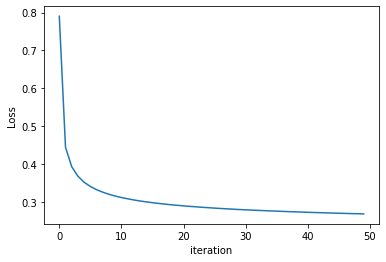

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

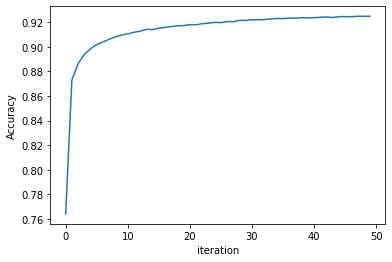

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.xlabel('iteration')
plt.ylabel('Accuracy')